In [1]:
# Imports the pandas library
import pandas as pd

In [3]:
# Loads the CSV file into a DataFrame.
df = pd.read_csv("yellow_tripdata_2024-12_new.csv", low_memory=False)

In [4]:
# Displays summary info about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3668371 entries, 0 to 3668370
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        float64
 4   trip_distance          float64
 5   RatecodeID             float64
 6   store_and_fwd_flag     object 
 7   PULocationID           int64  
 8   DOLocationID           int64  
 9   payment_type           int64  
 10  fare_amount            float64
 11  extra                  float64
 12  mta_tax                float64
 13  tip_amount             float64
 14  tolls_amount           float64
 15  improvement_surcharge  float64
 16  total_amount           float64
 17  congestion_surcharge   float64
 18  Airport_fee            float64
dtypes: float64(12), int64(4), object(3)
memory usage: 531.8+ MB


In [5]:
# Displays the first 5 rows of the DataFrame
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-12-01 00:12:27,2024-12-01 00:31:12,1.0,9.76,1.0,N,138,33,1,38.0,6.0,0.5,4.72,0.00,1.0,51.97,0.0,1.75
1,2,2024-11-30 23:56:04,2024-12-01 00:28:15,1.0,7.62,1.0,N,158,42,1,37.3,1.0,0.5,8.46,0.00,1.0,50.76,2.5,0.00
2,2,2024-12-01 00:50:35,2024-12-01 01:24:46,4.0,20.07,2.0,N,132,236,2,70.0,0.0,0.5,0.00,6.94,1.0,82.69,2.5,1.75
3,2,2024-12-01 00:18:16,2024-12-01 00:33:16,3.0,2.34,1.0,N,142,186,1,15.6,1.0,0.5,4.12,0.00,1.0,24.72,2.5,0.00
4,2,2024-12-01 00:56:13,2024-12-01 01:18:25,1.0,5.05,1.0,N,107,80,1,26.8,1.0,0.5,5.00,0.00,1.0,36.80,2.5,0.00


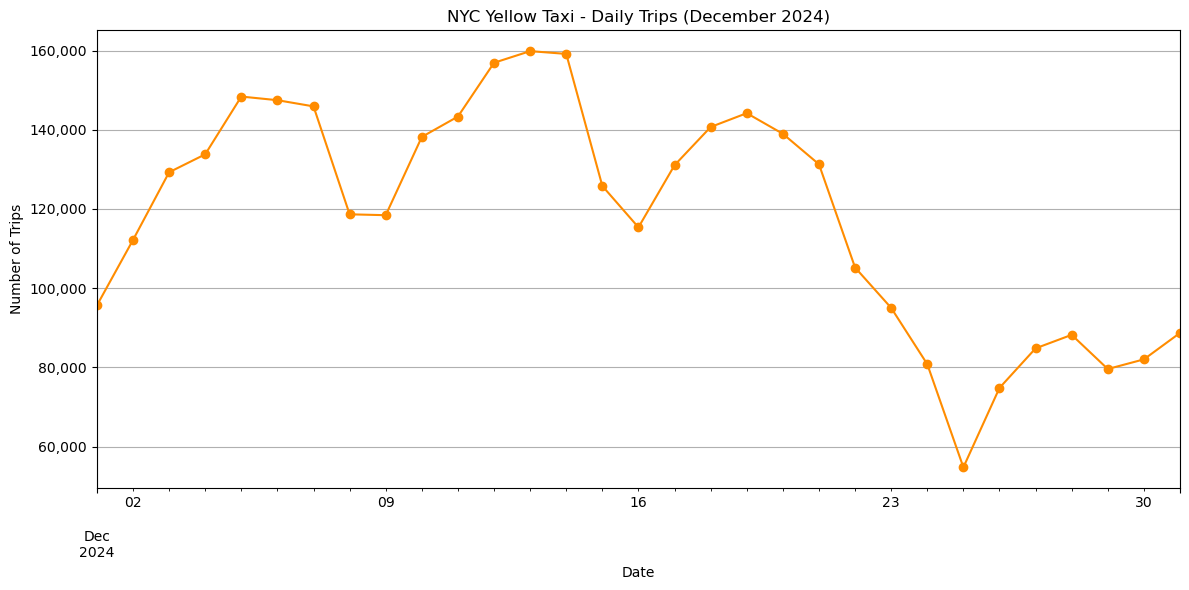

In [6]:
#plotting the graph for daily taxi trips records
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Set datetime index and sort it
df = df.set_index('tpep_pickup_datetime')
df = df.sort_index()

# Filter December 2024
df_dec = df.loc['2024-12-01':'2024-12-31']

# Daily aggregation
daily_trips = df_dec.resample('D').size()

# Plot
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 6))
daily_trips.plot(marker='o', linestyle='-', color='darkorange')
plt.title("NYC Yellow Taxi - Daily Trips (December 2024)")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.grid(True)

# Format y-axis to use commas
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

In [7]:
#Identify Missing Values
df.isnull().sum()

VendorID                 0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
Airport_fee              0
dtype: int64

In [ ]:
#Several columns in the dataset had missing values, including passenger_count, RatecodeID, and congestion_surcharge, 
#each missing in approximately 326,291 records. 
#However, since the time series analysis focused solely on tpep_pickup_datetime for aggregating trip counts, 
#these missing values were not relevant to the current analysis and were left untouched.


In [ ]:
# Fills missing values
df['passenger_count'] = df['passenger_count'].fillna(0)
df['RatecodeID'] = df['RatecodeID'].fillna(1)
df['congestion_surcharge'] = df['congestion_surcharge'].fillna(0.0)
df['Airport_fee'] = df['Airport_fee'].fillna(0.0)
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].fillna('Unknown')

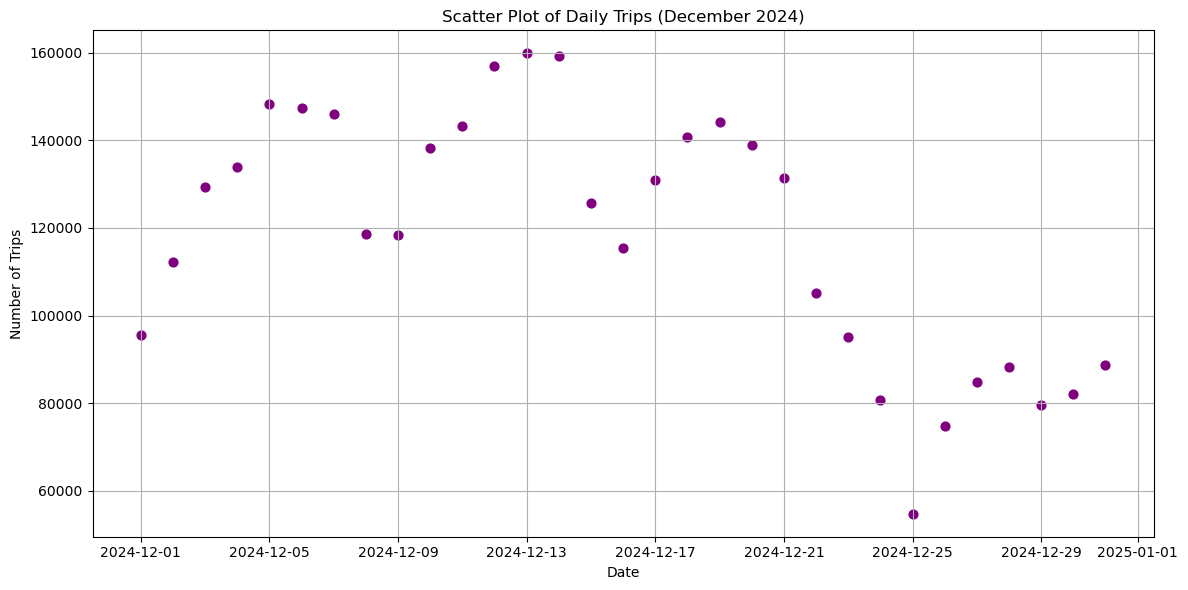

In [11]:
#plotting a scatterplot for outliers

import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(daily_trips.index, daily_trips.values, color='purple', s=40)
plt.title("Scatter Plot of Daily Trips (December 2024)")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.tight_layout()
plt.show()

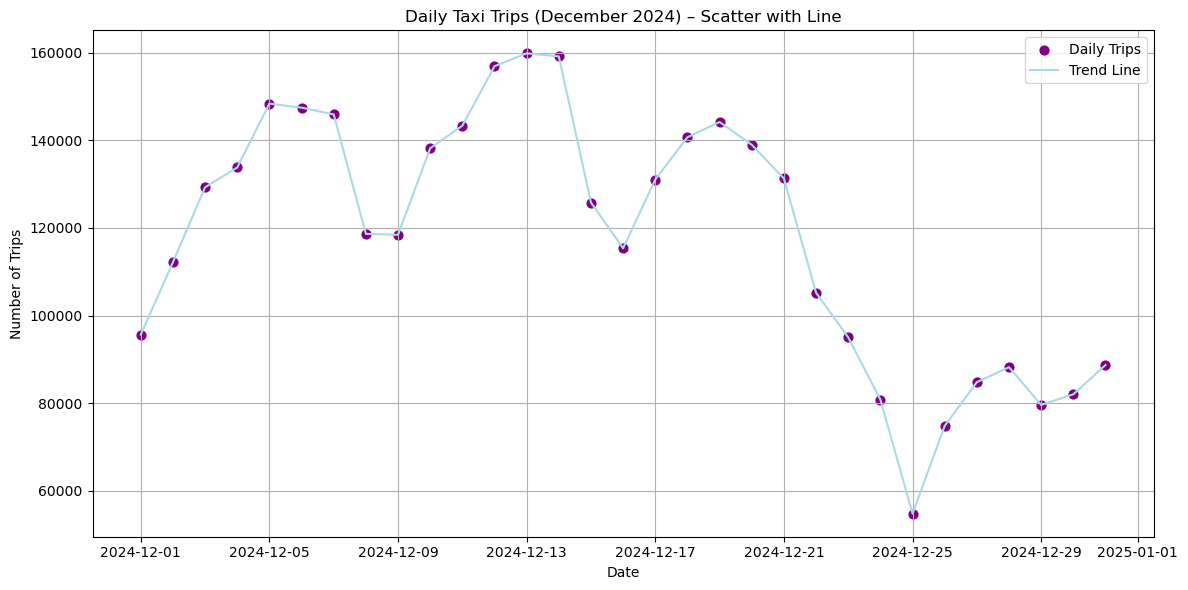

In [15]:
#plotting a line chart for identifying outliers

plt.figure(figsize=(12, 6))

# Scatter plot
plt.scatter(daily_trips.index, daily_trips.values, color='purple', s=40, label='Daily Trips')
plt.plot(daily_trips.index, daily_trips.values, color='lightblue', linestyle='-', label='Trend Line')
plt.title("Daily Taxi Trips (December 2024) – Scatter with Line")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

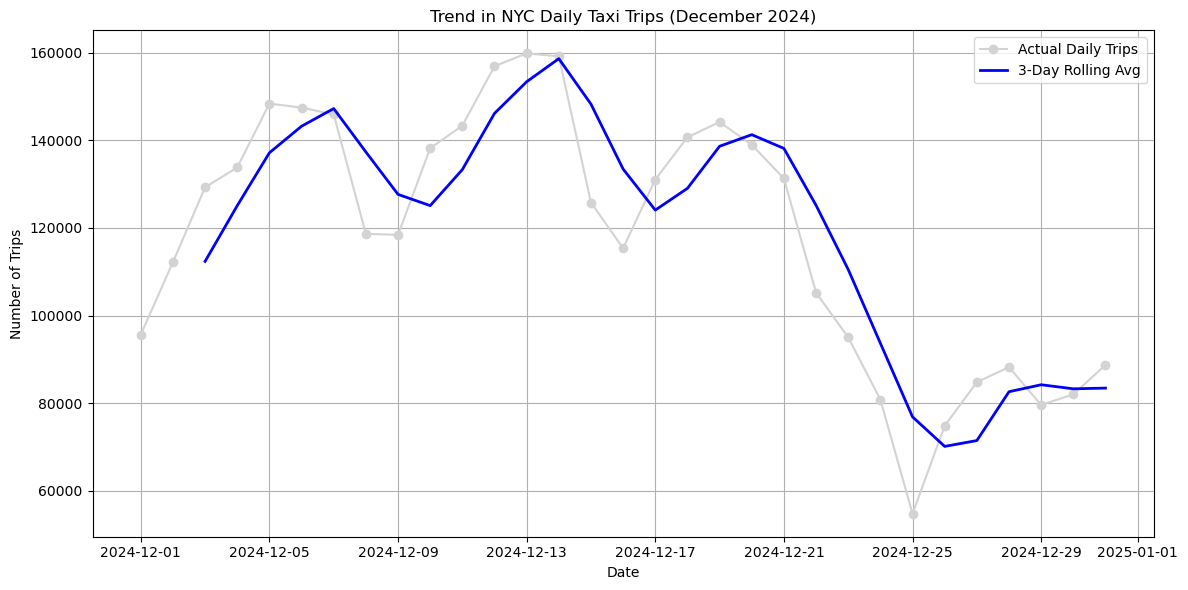

In [17]:
#Rolling Average to Reveal Trend
# Calculate 3-day rolling average
rolling_avg = daily_trips.rolling(window=3).mean()

# Plot actual vs smoothed values
plt.figure(figsize=(12, 6))
plt.plot(daily_trips.index, daily_trips.values, marker='o', linestyle='-', label='Actual Daily Trips', color='lightgray')
plt.plot(rolling_avg.index, rolling_avg.values, label='3-Day Rolling Avg', color='blue', linewidth=2)

plt.title("Trend in NYC Daily Taxi Trips (December 2024)")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# What the Chart Shows:
	#•	Early December: Gradual rise in trips, suggesting an increase in travel activity leading up to mid-December.
	#•	Mid December (around 12th–15th): Peak demand — possibly due to holiday shopping or office commute peaks.
#	•	Late December: Clear downward trend starting around December 20th — likely due to holiday closures and reduced work-related travel.
	#•	Post-Christmas (Dec 25 onward): A small rebound in demand as New Year approaches.


In [ ]:
#Suggested Summary for Your Report – Trend Analysis Section:

#A 3-day rolling average was applied to smooth daily fluctuations in taxi trip volume. 
#The smoothed trend revealed a clear upward pattern in early December, 
#likely reflecting increased city activity and holiday preparation. 
#Peak demand occurred mid-month, followed by a consistent decline after December 20th, 
#which may be attributed to holiday vacations, reduced business operations, and colder weather. 
#A minor recovery in trips was observed toward the end of the month, potentially due to New Year’s travel and celebrations.


In [19]:
#ADF Test (Stationarity Check)
from statsmodels.tsa.stattools import adfuller

# Drop any missing values 
series = daily_trips.dropna()

# Running the ADF test
adf_result = adfuller(series)

# Printing results
print("ADF Test Results:")
print(f"ADF Statistic     : {adf_result[0]}")
print(f"p-value           : {adf_result[1]}")
print("Critical Values   :")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

ADF Test Results:
ADF Statistic     : -2.305566590664698
p-value           : 0.17017892023911135
Critical Values   :
   1%: -3.7883858816542486
   5%: -3.013097747543462
   10%: -2.6463967573696143


In [ ]:
#ADF Test Interpretation
	#•	ADF Statistic: -2.31
	#•	p-value: 0.1702 (→ greater than 0.05)
	#	Conclusion: The time series is non-stationary at the 5% significance level.


In [ ]:
# What This Means:
#•	Your daily trip count series has a trend or seasonality that affects its statistical properties (like mean and variance) over time.
#•	To use models like ARIMA, you would need to difference the series to remove the trend and make it stationary.
#•	But for decomposition (your next task), this result is still fine — decomposition helps extract the trend, seasonality, and residual components explicitly.



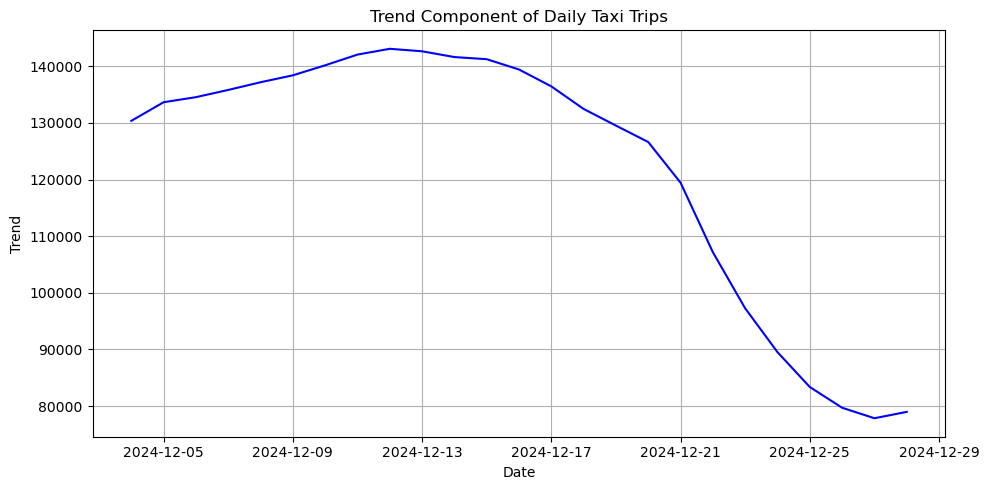

In [21]:
# ploting the Trend Component
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose and extract trend only
trend = seasonal_decompose(daily_trips, model='additive', period=7).trend

# Plot Trend
plt.figure(figsize=(10, 5))
plt.plot(trend, color='blue')
plt.title("Trend Component of Daily Taxi Trips")
plt.xlabel("Date")
plt.ylabel("Trend")
plt.grid(True)
plt.tight_layout()
plt.show()

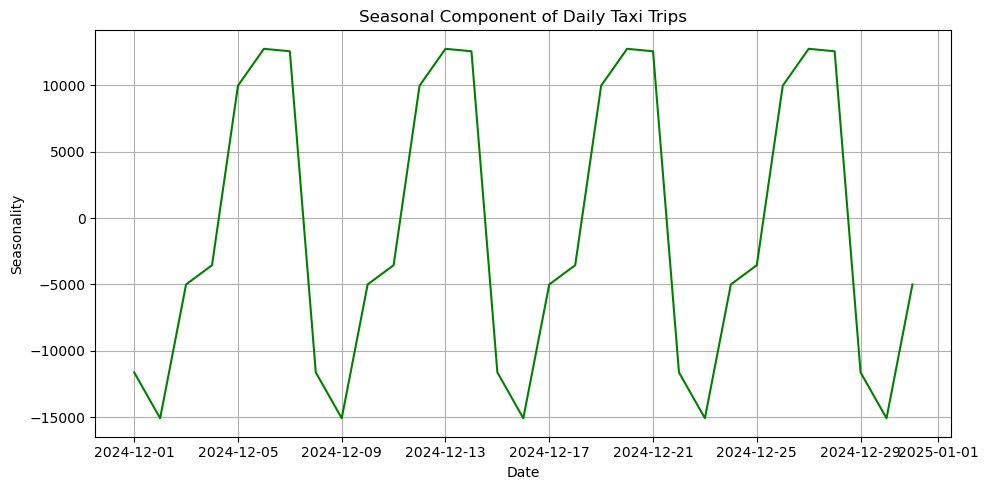

In [23]:
# plotting the Seasonal Component
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose and extract seasonal only
seasonal = seasonal_decompose(daily_trips, model='additive', period=7).seasonal

# Plot Seasonality
plt.figure(figsize=(10, 5))
plt.plot(seasonal, color='green')
plt.title("Seasonal Component of Daily Taxi Trips")
plt.xlabel("Date")
plt.ylabel("Seasonality")
plt.grid(True)
plt.tight_layout()
plt.show()

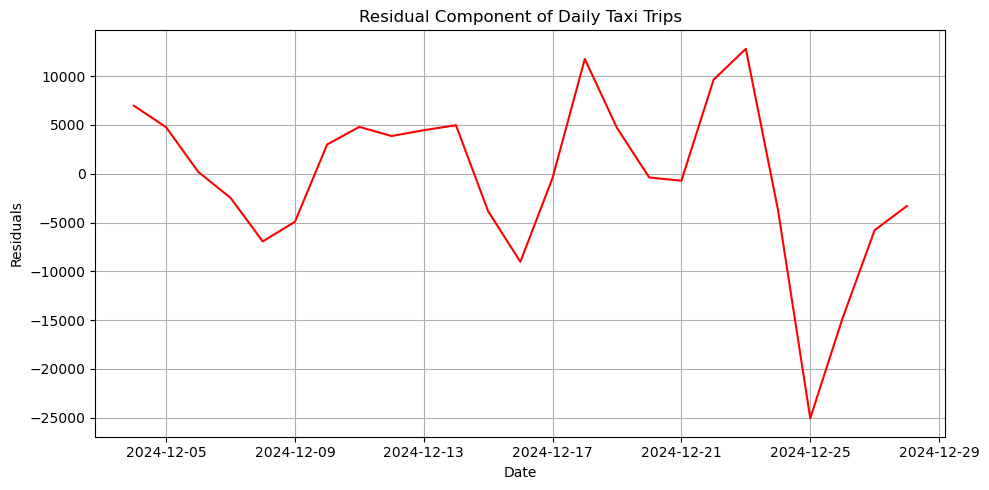

In [25]:
# plotting thr Residual Component
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose and extract residuals only
residual = seasonal_decompose(daily_trips, model='additive', period=7).resid

# Plot Residuals
plt.figure(figsize=(10, 5))
plt.plot(residual, color='red')
plt.title("Residual Component of Daily Taxi Trips")
plt.xlabel("Date")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

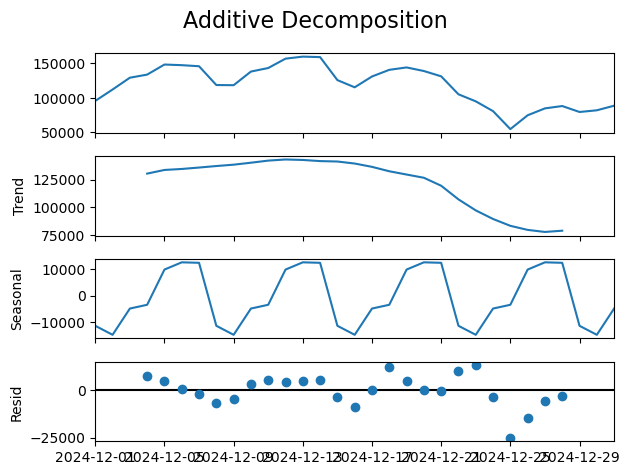

In [27]:
# plotting the Additive Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

additive = seasonal_decompose(daily_trips, model='additive', period=7)

additive.plot()
plt.suptitle("Additive Decomposition", fontsize=16)
plt.tight_layout()
plt.show()

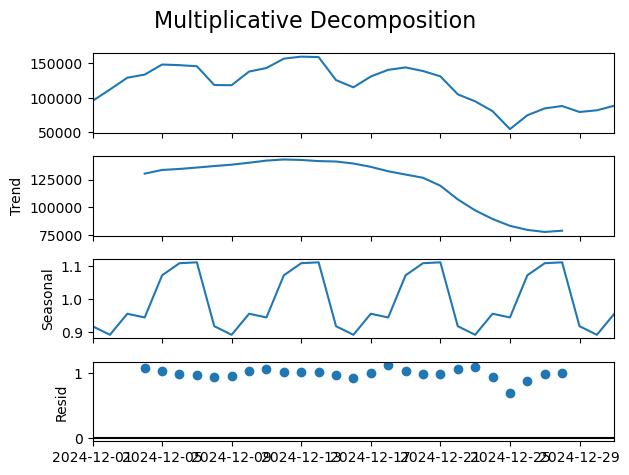

In [29]:
# plotting the Multiplicative Decomposition
multiplicative = seasonal_decompose(daily_trips, model='multiplicative', period=7)

multiplicative.plot()
plt.suptitle("Multiplicative Decomposition", fontsize=16)
plt.tight_layout()
plt.show()

In [31]:
# forecasting model and performance evaluations
#ARIMA
# Ensure datetime index is sorted
daily_trips = daily_trips.sort_index()

# Train-test split the data
train = daily_trips[:'2024-12-24']
test = daily_trips['2024-12-25':]

In [33]:
#Difference the Series (d=1),To make it stationary for ARIMA
# First difference
diff_train = train.diff().dropna()
from statsmodels.tsa.stattools import adfuller
result = adfuller(diff_train)
print(f"ADF p-value after differencing: {result[1]:.4f}")


ADF p-value after differencing: 1.0000


In [35]:
# Calculates first-order difference to remove trend and drops missing values
diff_train = train.diff().dropna()

In [37]:
# checking for stationarity in the time series
from statsmodels.tsa.stattools import adfuller
result = adfuller(diff_train)
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: 11.079423833867143
p-value: 1.0


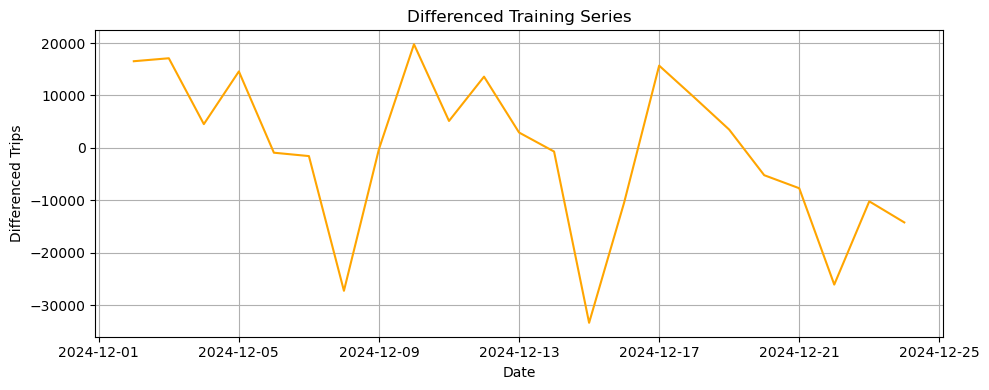

In [39]:
# Plots the differenced training time series to visualize stationarity
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(diff_train, color='orange')
plt.title("Differenced Training Series")
plt.xlabel("Date")
plt.ylabel("Differenced Trips")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Conclusion: Even though the ADF test says it’s non-stationary (due to small data size), 
#visually the differenced series looks stationary — and that’s what matters most for ARIMA.

In [41]:
# Fits an ARIMA model on the training data and prints the summary

from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA on training data
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model (optional)
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -250.871
Date:                Sun, 13 Apr 2025   AIC                            507.742
Time:                        11:18:50   BIC                            511.149
Sample:                    12-01-2024   HQIC                           508.599
                         - 12-24-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3585      0.574      0.625      0.532      -0.766       1.483
ma.L1         -0.1312      0.705     -0.186      0.852      -1.514       1.251
sigma2      1.886e+08   5.44e-09   3.46e+16      0.0

In [43]:
# Forecast the next 7 days (length of test set)
forecast = model_fit.forecast(steps=len(test))

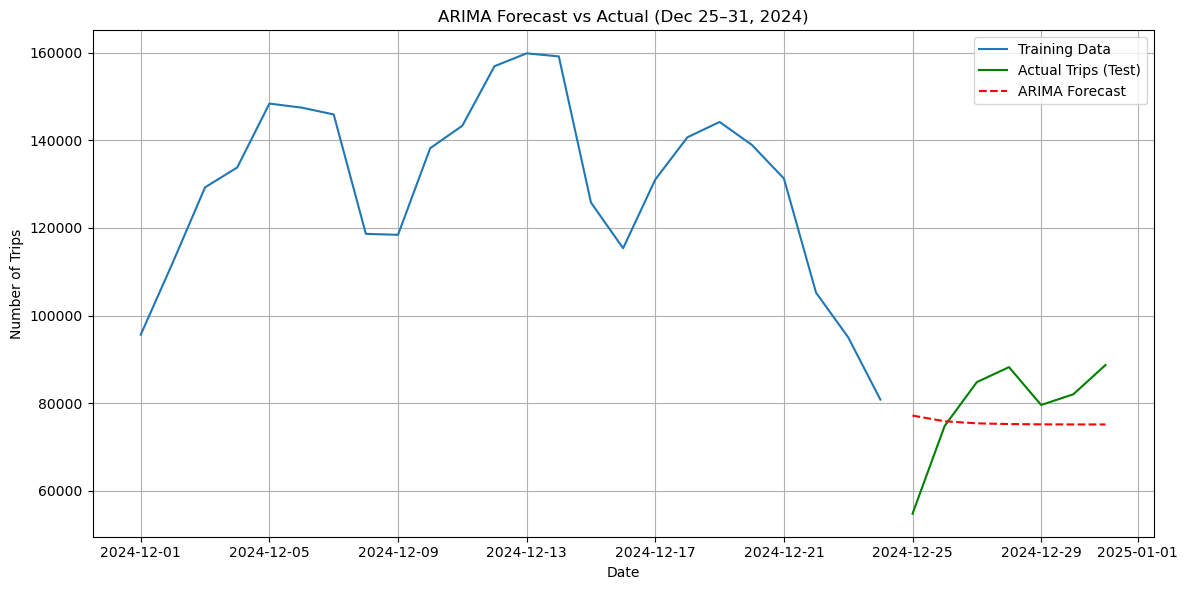

In [45]:
# Plots the ARIMA forecast against actual test data for December 25–31.
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Trips (Test)', color='green')
plt.plot(forecast, label='ARIMA Forecast', color='red', linestyle='--')
plt.title("ARIMA Forecast vs Actual (Dec 25–31, 2024)")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

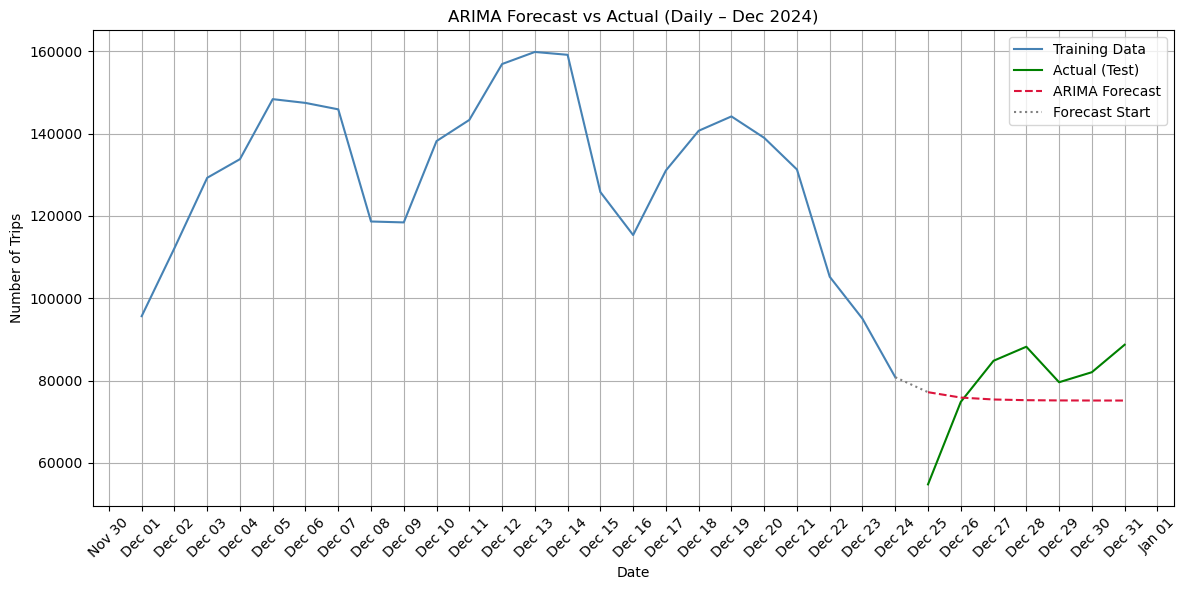

In [47]:
# Plots ARIMA forecast with daily date formatting.
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(train.index, train.values, label='Training Data', color='steelblue')
plt.plot(test.index, test.values, label='Actual (Test)', color='green')
plt.plot(forecast.index, forecast.values, label='ARIMA Forecast', color='crimson', linestyle='--')
plt.plot(
    [train.index[-1], forecast.index[0]],
    [train.values[-1], forecast.values[0]],
    color='gray', linestyle=':', label='Forecast Start'
)

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))  
plt.xticks(rotation=45)  

plt.title("ARIMA Forecast vs Actual (Daily – Dec 2024)")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
#wrap forecast in a Series with correct index
forecast_series = pd.Series(model_fit.forecast(steps=len(test)).values, index=test.index)

# Now evaluate the forecast
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, forecast_series))
mae = mean_absolute_error(test, forecast_series)
mape = np.mean(np.abs((test - forecast_series) / test)) * 100
mse = mean_squared_error(test, forecast_series)

print(f"📊 ARIMA Model Evaluation:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"MSE : {mse:.2f}")

📊 ARIMA Model Evaluation:
RMSE: 12017.63
MAE : 10101.14
MAPE: 13.91%
MSE : 144423490.40


In [51]:
# Fits an ETS model
from statsmodels.tsa.holtwinters import ExponentialSmoothing
ets_model = ExponentialSmoothing(
    train,
    trend='add',
    seasonal='add',
    seasonal_periods=7,
    initialization_method='heuristic',
    use_boxcox=False  
).fit(optimized=True)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [53]:
# Generates ETS model forecast for the same length as the test set
ets_forecast = ets_model.forecast(steps=len(test))

In [55]:
#printing ETS model evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(test, ets_forecast))
mae = mean_absolute_error(test, ets_forecast)
mape = np.mean(np.abs((test - ets_forecast) / test)) * 100
mse = mean_squared_error(test, ets_forecast)

print(f"📉 ETS Evaluation:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"MSE : {mse:.2f}")

📉 ETS Evaluation:
RMSE: 34665.71
MAE : 30229.52
MAPE: 40.47%
MSE : 1201711360.50


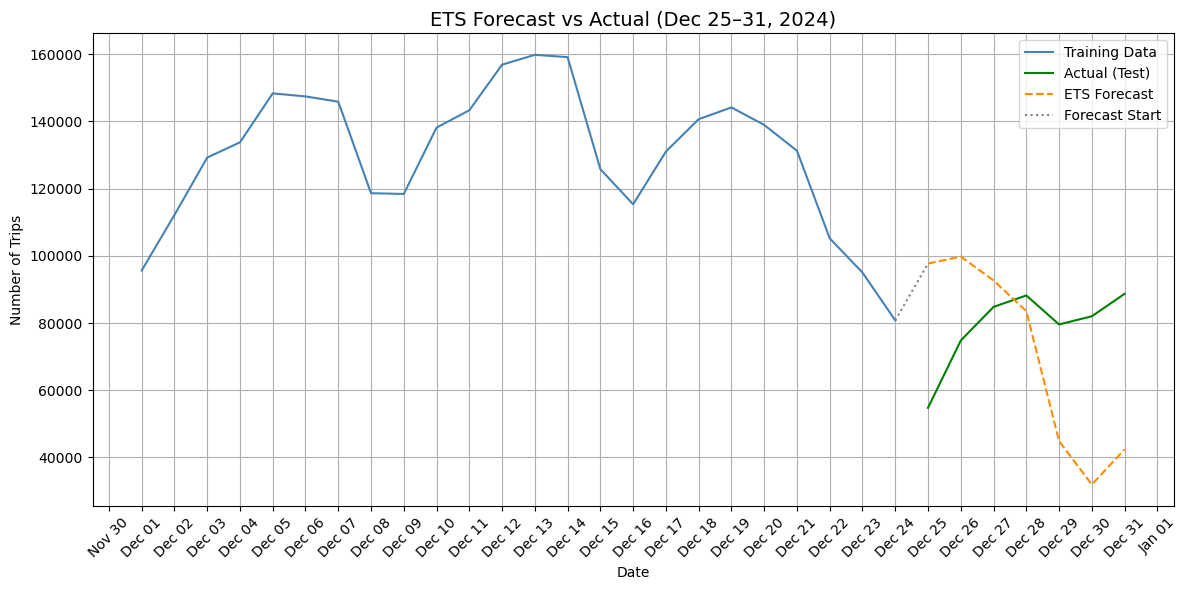

In [57]:
# Plots ETS forecast against actual test data with daily date 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

ets_forecast = pd.Series(ets_forecast.values, index=test.index)

plt.figure(figsize=(12, 6))

plt.plot(train.index, train.values, label='Training Data', color='steelblue')
plt.plot(test.index, test.values, label='Actual (Test)', color='green')
plt.plot(ets_forecast.index, ets_forecast.values, label='ETS Forecast', color='darkorange', linestyle='--')

plt.plot(
    [train.index[-1], ets_forecast.index[0]],
    [train.values[-1], ets_forecast.values[0]],
    color='gray', linestyle=':', label='Forecast Start'
)


plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45)

plt.title("ETS Forecast vs Actual (Dec 25–31, 2024)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [59]:
# Prepare train data for Prophet
prophet_train = train.reset_index()
prophet_train.columns = ['ds', 'y']  

In [61]:
from prophet import Prophet

# Initialize and fit the model
prophet_model = Prophet()
prophet_model.fit(prophet_train)

11:19:15 - cmdstanpy - INFO - Chain [1] start processing
11:19:15 - cmdstanpy - INFO - Chain [1] done processing


In [63]:
# Create future dataframe for forecast
future = prophet_model.make_future_dataframe(periods=len(test))

# Forecast
forecast = prophet_model.predict(future)

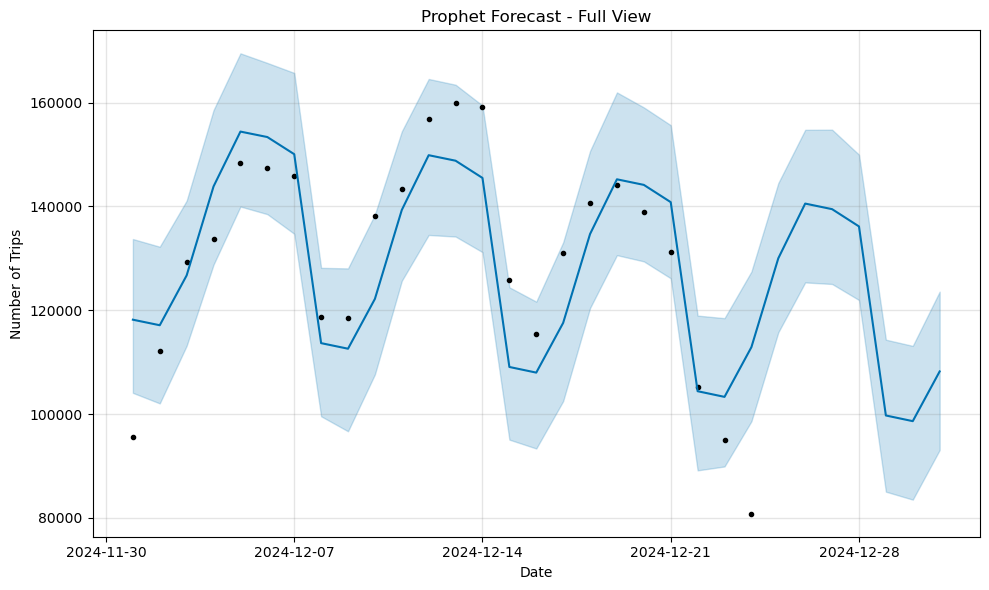

In [65]:
# Plot the whole forecast 
prophet_model.plot(forecast)
plt.title("Prophet Forecast - Full View")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.grid(True)
plt.tight_layout()
plt.show()

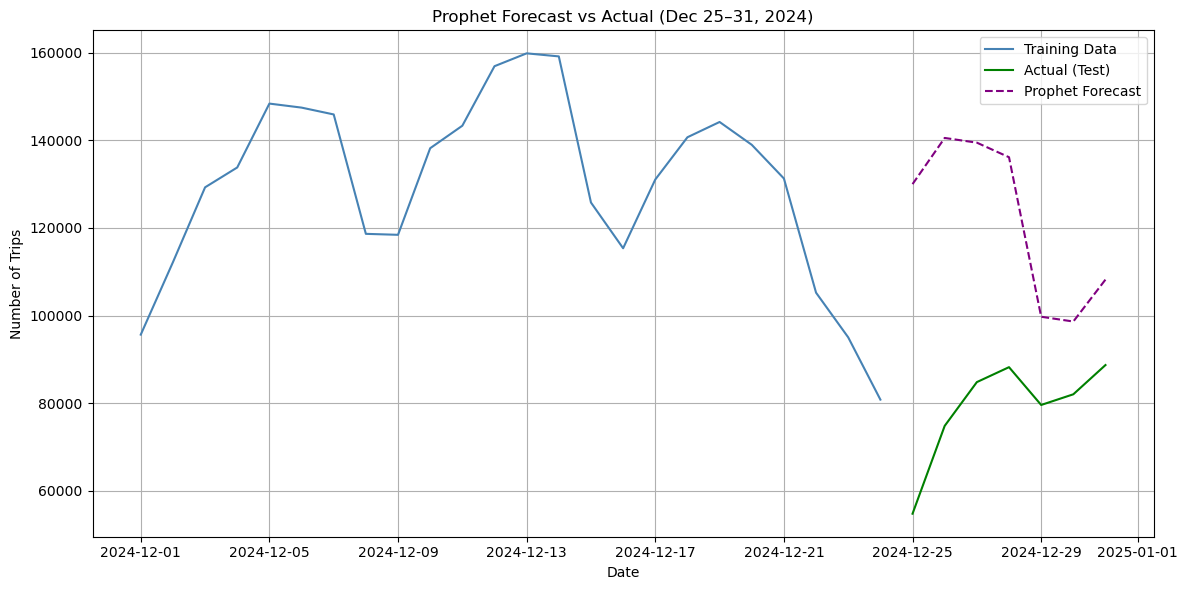

In [67]:
# forecasting for the future week
prophet_forecast = forecast.set_index('ds').loc[test.index]['yhat']

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values, label='Training Data', color='steelblue')
plt.plot(test.index, test.values, label='Actual (Test)', color='green')
plt.plot(prophet_forecast.index, prophet_forecast.values, label='Prophet Forecast', color='purple', linestyle='--')

plt.title("Prophet Forecast vs Actual (Dec 25–31, 2024)")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

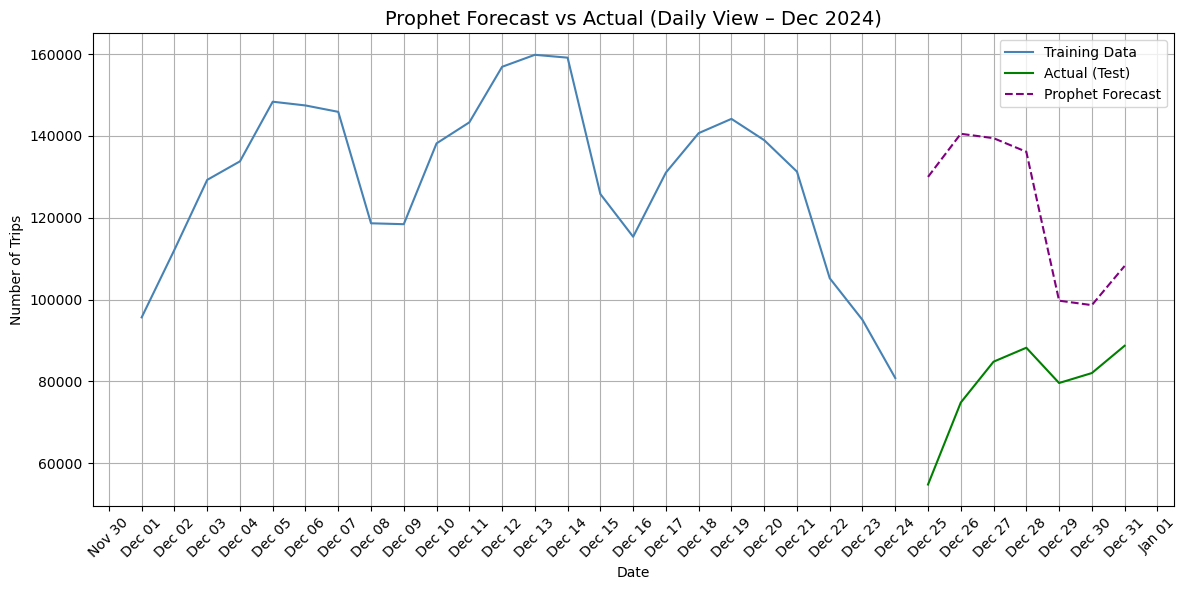

In [69]:
#forecasting for everyday 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


prophet_forecast = forecast.set_index('ds').loc[test.index]['yhat']
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values, label='Training Data', color='steelblue')
plt.plot(test.index, test.values, label='Actual (Test)', color='green')
plt.plot(prophet_forecast.index, prophet_forecast.values, label='Prophet Forecast', color='purple', linestyle='--')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.xticks(rotation=45)
plt.title("Prophet Forecast vs Actual (Daily View – Dec 2024)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [71]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Evaluation metrics for Prophet forecast
rmse = np.sqrt(mean_squared_error(test, prophet_forecast))
mae = mean_absolute_error(test, prophet_forecast)
mape = np.mean(np.abs((test - prophet_forecast) / test)) * 100
mse = mean_squared_error(test, prophet_forecast)

print(f"📈 Prophet Model Evaluation:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"MSE : {mse:.2f}")

📈 Prophet Model Evaluation:
RMSE: 48291.63
MAE : 42826.47
MAPE: 58.79%
MSE : 2332081159.36


In [73]:
#importing the libraries for LSTM
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [74]:
# Combine train and test for scaling
full_series = pd.concat([train, test])
scaler = MinMaxScaler()
scaled_series = scaler.fit_transform(full_series.values.reshape(-1, 1))

# Convert back to pandas Series with date index
scaled_series = pd.Series(scaled_series.flatten(), index=full_series.index)

In [77]:
def create_sequences(series, window_size):
    X, y = [], []
    for i in range(window_size, len(series)):
        X.append(series[i-window_size:i])
        y.append(series[i])
    return np.array(X), np.array(y)
window_size = 7

# Split into training and testing
split_index = len(train)
train_scaled = scaled_series[:split_index]
test_scaled = scaled_series[split_index - window_size:]

# Create sequences
X_train, y_train = create_sequences(train_scaled.values, window_size)
X_test, y_test = create_sequences(test_scaled.values, window_size)

# Reshape for LSTM: 
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [79]:
# fit the model 
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    Input(shape=(window_size, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, verbose=0)

In [81]:
# Predict using LSTM
y_pred = model.predict(X_test)

# Inverse scale predictions and actuals
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [83]:
# evaluation metrics for LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100
mse = mean_squared_error(y_test_inv, y_pred_inv)

print("📉 LSTM Evaluation Metrics")
print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"MAPE: {mape:.2f}%")
print(f"MSE : {mse:.2f}")

📉 LSTM Evaluation Metrics
RMSE: 27633.42
MAE : 19530.59
MAPE: 29.60%
MSE : 763606004.79


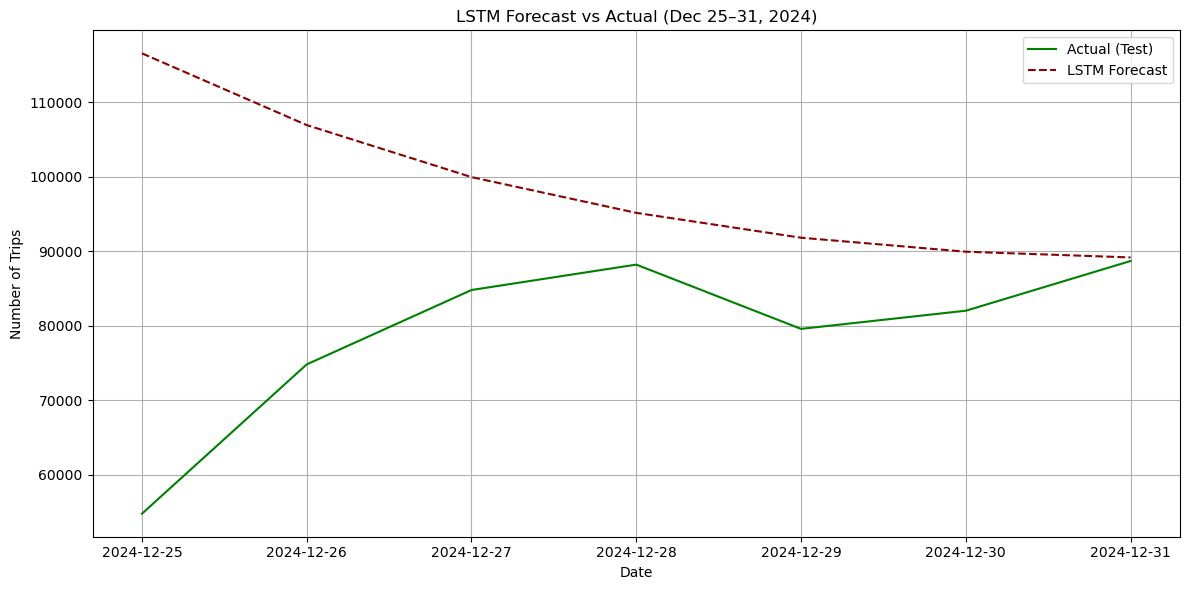

In [85]:
#forecasting for the future week
forecast_dates = test.index[-len(y_pred_inv):]

plt.figure(figsize=(12, 6))
plt.plot(test.index, test.values, label='Actual (Test)', color='green')
plt.plot(forecast_dates, y_pred_inv.flatten(), label='LSTM Forecast', color='darkred', linestyle='--')

plt.title("LSTM Forecast vs Actual (Dec 25–31, 2024)")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()